# Trabalho prático 1

## Exercício 1

In [283]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.colors as clr
import numpy as np

In [284]:
img1 = Image.open('./imagens/peppers.bmp')
img1 = img1.convert('RGB')
img1.save('./imagens/peppers_compressed_ultra_high.jpg', quality=100)
img1.save('./imagens/peppers_compressed_high.jpg', quality=75)
img1.save('./imagens/peppers_compressed_medium.jpg', quality=50)
img1.save('./imagens/peppers_compressed_low.jpg', quality=25)

img2 = Image.open('./imagens/logo.bmp')
img2 = img2.convert('RGB')
img2.save('./imagens/logo_compressed_ultra_high.jpg', quality=100)
img2.save('./imagens/logo_compressed_high.jpg', quality=75)
img2.save('./imagens/logo_compressed_medium.jpg', quality=50)
img2.save('./imagens/logo_compressed_low.jpg', quality=25)

img3 = Image.open('./imagens/barn_mountains.bmp')
img3 = img3.convert('RGB')
img3.save('./imagens/barn_mountains_compressed_ultra_high.jpg', quality=100)
img3.save('./imagens/barn_mountains_compressed_high.jpg', quality=75)
img3.save('./imagens/barn_mountains_compressed_medium.jpg', quality=50)
img3.save('./imagens/barn_mountains_compressed_low.jpg', quality=25)

In [285]:
def compress_graph(image_name):
    img = Image.open(f'./imagens/{image_name}').convert('RGB')
    quality = []
    size = []
    for i in range(100, -1, -1):
        img.save(f'./imagens/animations/{image_name}_{i}.jpg', quality=i)
        quality.append(i)
    
    for i in range(100, -1, -1):
        size.append(os.path.getsize(f'./imagens/animations/{image_name}_{i}.jpg')/1000)
    
    images = []

    for i in range(100, -1, -1):
        img = Image.open(f'./imagens/animations/{image_name}_{i}.jpg')
        images.append(img)

    images[0].save(f'./imagens/{image_name}.gif', save_all=True, append_images=images[1:], optimize=False, duration=2)

    plt.figure()
    plt.title(f'Relação entre qualidade e o tamanho da compressão JPG de: {image_name}')
    plt.plot(quality, size)
    plt.xlabel('Quality')
    plt.ylabel('Size (KB)')
    plt.show()

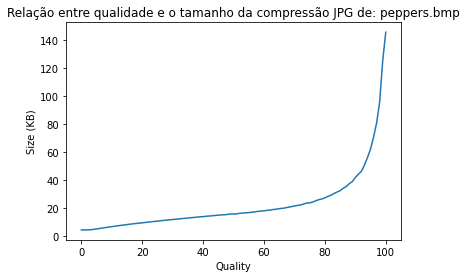

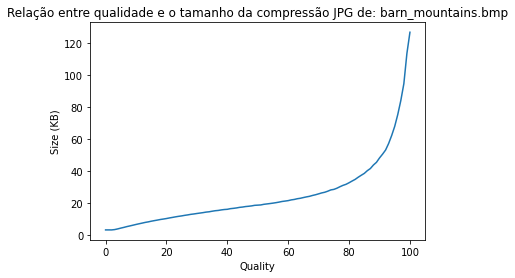

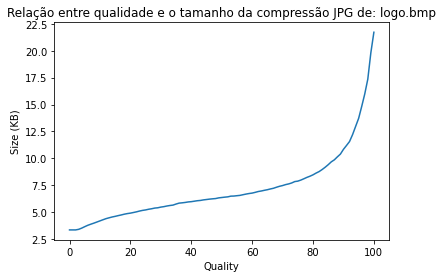

In [286]:
compress_graph('peppers.bmp')
compress_graph('barn_mountains.bmp')
compress_graph('logo.bmp')

In [287]:
def entropy(array):
    _, counts = np.unique(array, return_counts=True)
    array_length = array.size
    ent = 0

    for count in counts:
        ent -= count / array_length * np.log2(count / array_length)

    return ent

In [288]:
img_peppers = plt.imread('./imagens/peppers.bmp')
img_logo = plt.imread('./imagens/logo.bmp')
img_barn_mountains = plt.imread('./imagens/barn_mountains.bmp')
print('Peppers entropy: ', entropy(img_peppers))
print('Logo entropy: ', entropy(img_logo))
print('Barn moutains entropy: ', entropy(img_barn_mountains))


Peppers entropy:  7.378534223569768
Logo entropy:  2.107625892350544
Barn moutains entropy:  7.642068223565277


### Resultados e Conclusões

| | Original | Ultra Hight | High | Medium | Low | Animation |
|---|---|---|---|---|---|---|
| Images |<img src='./imagens/peppers.bmp' width=400 heigh=200/> |<img src='imagens/peppers_compressed_ultra_high.jpg' width=400 heigh=200/>  | <img src='./imagens/peppers_compressed_high.jpg' width=400 heigh=200/>| <img src='./imagens/peppers_compressed_medium.jpg' width=400 heigh=200/> |<img src='./imagens/peppers_compressed_low.jpg' width=400 heigh=200/> | <img src='./imagens/peppers.bmp.gif' width=400 heigh=200/> |
| Quality | --- | 100%| 75% | 50% | 25% | 100% - 0% | 
| Size (pixeis) | 384 x 512 | 384 x 512 | 384 x 512 | 384 x 512 | 384 x 512 |
| Size (KB) | 577KB | 142KB |24KB | 16KB | 11KB| --- |
| Compression Rate | --- | 75.39% | 95,85% | 97,23% | 98,09% | --- |

| | Original | Ultra Hight | High | Medium | Low | Animation |
|---|---|---|---|---|---|---|
| Images |<img src='./imagens/logo.bmp' width=400 heigh=200/> |<img src='imagens/logo_compressed_ultra_high.jpg' width=400 heigh=200/>  | <img src='./imagens/logo_compressed_high.jpg' width=400 heigh=200/>| <img src='./imagens/logo_compressed_medium.jpg' width=400 heigh=200/> |<img src='./imagens/logo_compressed_low.jpg' width=400 heigh=200/> | <img src='./imagens/logo.bmp.gif' width=400 heigh=200/> |
| Quality | --- | 100%| 75% | 50% | 25% | 100% - 0% | 
| Size (pixeis) | 281 x 500 | 281 x 500 | 281 x 500 | 281 x 500 | 281 x 500 |
| Size (KB) | 422KB | 22KB | 8KB| 7KB| 6KB | --- |
| Compression Rate | --- | 94.79% | 98,10% | 98.34% | 98,58% | --- |

| | Original | Ultra Hight | High | Medium | Low | Animation |
|---|---|---|---|---|---|---|
| Images |<img src='./imagens/barn_mountains.bmp' width=400 heigh=200/> |<img src='imagens/barn_mountains_compressed_ultra_high.jpg' width=400 heigh=200/>  | <img src='./imagens/barn_mountains_compressed_high.jpg' width=400 heigh=200/>| <img src='./imagens/barn_mountains_compressed_medium.jpg' width=400 heigh=200/> |<img src='./imagens/barn_mountains_compressed_low.jpg' width=400 heigh=200/> | <img src='./imagens/barn_mountains.bmp.gif' width=400 heigh=200/> |
| Quality | --- | 100%| 75% | 50% | 25% | 100% - 0% | 
| Size (pixeis) | 297 x 400 | 297 x 400 | 297 x 400 | 297 x 400 | 297 x 400 |
| Size (KB) | 349KB| 124KB | 28KB | 19KB | 12KB | --- |
| Compression Rate | --- | 64.47% | 91.98% | 94.56% | 96.56% | --- |

| |Peppers | Logo | Barn mountains |
|---|---|---|---|
| Entropy | 7.38 | 2.11 | 7.64 |
| Original size | 577KB | 412KB | 349KB |
| Compressed size (100% quality in JPG) | 142KB | 22KB | 124KB |
| Compression rate | 75.39% | 94.66% | 64.47% |

Comparando os resultados obtidos, podemos concluir que, com uma taxa de compressão de 25% ainda é possível obter

## Exercício 2

In [289]:
def encoder(image):
    pass

In [290]:
def decoder(image):
    pass

## Exercício 3

In [291]:
def plot_image(image, colormap=create_colormap(['black', 'white']), title=""):
    plt.figure() 
    plt.title(title)
    plt.imshow(image, colormap)
    plt.axis('off')
    plt.show()

In [292]:
## read image
def read_image(image_name):
    image = np.array(plt.imread(image_name))
    return image


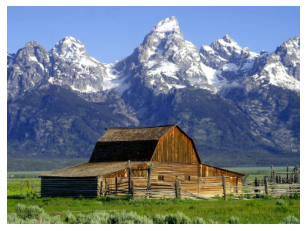

In [293]:
image = read_image('./imagens/barn_mountains.bmp')
plot_image(image)


In [294]:
## create colormap
def create_colormap(color_list):
    return clr.LinearSegmentedColormap.from_list('cmap', color_list, N=256)


In [295]:
red_map = create_colormap(['black', 'red'])
green_map = create_colormap(['black', 'green'])
blue_map = create_colormap(['black', 'blue'])
random_map = create_colormap(['blue', 'orange', 'pink'])

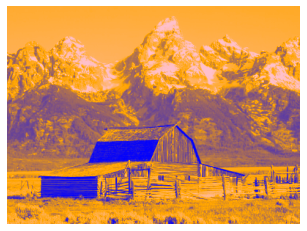

In [296]:
plot_image(image[:, :, 1], random_map)

In [297]:
def get_image_rgb(image):
    return np.array((image[:, :, 0], image[:, :, 1], image[:, :, 2]))

In [298]:
def get_image_from_rgb(rgb):
    lines, columns = rgb[0].shape
    img = np.zeros((lines, columns, 3), dtype=np.uint8)
    img[:, :, 0] = rgb[0]
    img[:, :, 1] = rgb[1]
    img[:, :, 2] = rgb[2]
    return img

(3, 297, 400)


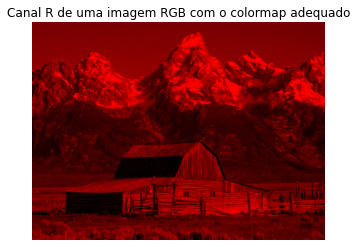

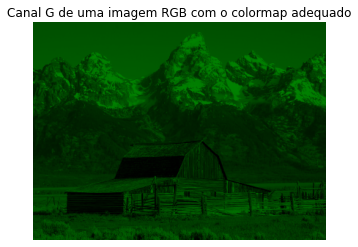

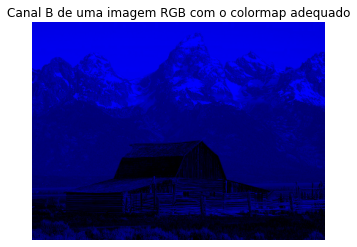

In [299]:
img_rgb = get_image_rgb(image)
print(img_rgb.shape)
plot_image(img_rgb[0], red_map, 'Canal R de uma imagem RGB com o colormap adequado')
plot_image(img_rgb[1], green_map, 'Canal G de uma imagem RGB com o colormap adequado')
plot_image(img_rgb[2], blue_map, 'Canal B de uma imagem RGB com o colormap adequado')

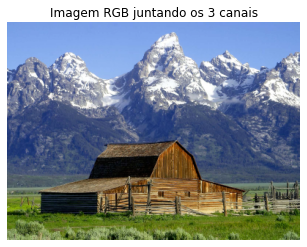

In [300]:
plot_image(get_image_from_rgb(img_rgb), title='Imagem RGB juntando os 3 canais')

# Exercicio 4

In [301]:
def add_padding(image):
    rows, columns, _ = image.shape
    
    
    red = image[:, :, 0]
    green = image[:, :, 1]
    blue = image[:, :, 2]
    
    while rows % 16 != 0:
        red = np.vstack([red, red[-1, :]])
        green = np.vstack([green, green[-1, :]])
        blue = np.vstack([blue, blue[-1, :]])
        rows, columns = red.shape
    
    while columns % 16 != 0:
        red = np.hstack([red, red[:, -1].reshape(-1, 1)])
        green = np.hstack([green, green[:, -1].reshape(-1, 1)])
        blue = np.hstack([blue, blue[:, -1].reshape(-1, 1)])
        rows, columns = red.shape
    
    return get_image_from_rgb((red, green, blue))
    

In [302]:
def revert_padding(image, original_rows, original_columns):
    rows, columns, _ = image.shape
    if rows < original_rows or columns < original_columns:
        return image
    
    return image[:original_rows, :original_columns, :]


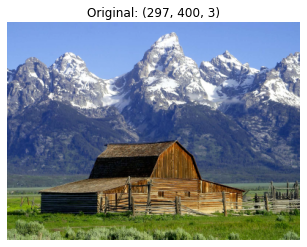

In [303]:
image = read_image('./imagens/barn_mountains.bmp')
plot_image(image, title=f'Original: {image.shape}')
original_rows, original_columns, _ = image.shape

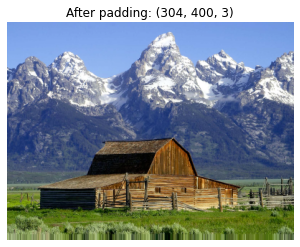

In [304]:
image = add_padding(image)
plot_image(image, title=f'After padding: {image.shape}')

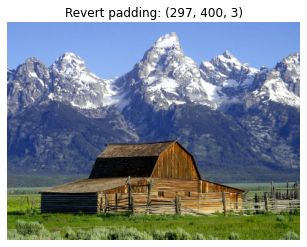

In [305]:
image = revert_padding(image, original_rows, original_columns)
plot_image(image, title=f'Revert padding: {image.shape}')

## Exercício 5

### Conversão para o modelo cor YCbCr

In [306]:
def convert_rgb_to_ycbcr(image):
    ycbcr_matrix = np.array([
                    [0.299, 0.587, 0.114],
                    [-0.168736, -0.331264, 0.5],
                    [0.5, -0.418688, -0.081312]])
                    
    aux = image.dot(ycbcr_matrix.T)
    aux[:, :, 1:3] += 128
    return aux

In [307]:
def convert_ycbcr_to_rgb(image):
    ycbcr_matrix = np.array([
                    [0.299, 0.587, 0.114],
                    [-0.168736, -0.331264, 0.5],
                    [0.5, -0.418688, -0.081312]])
                    
    inverse = np.linalg.inv(ycbcr_matrix.T)
    aux = np.copy(image)
    aux[:, :, 1:3] -= 128
    return aux.dot(inverse)

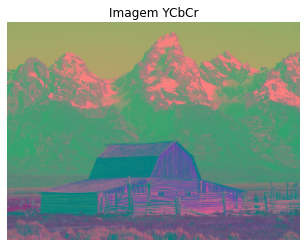

In [308]:
image = read_image('./imagens/barn_mountains.bmp')
first_pixel = image[0, 0]
image2 = np.array(Image.open('./imagens/barn_mountains.bmp').convert('YCbCr'))
image = convert_rgb_to_ycbcr(image)
plot_image(np.uint8(image), title='Imagem YCbCr')

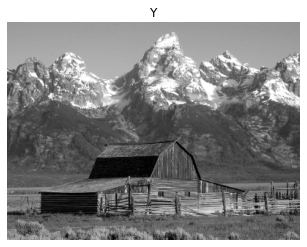

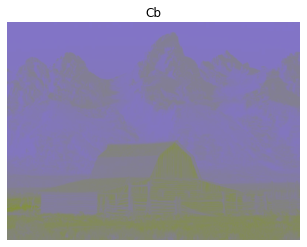

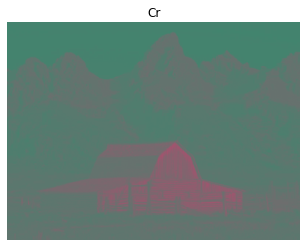

In [309]:
plot_image(image[:, :, 0], 'gray', 'Y')
plot_image(image[:, :, 1], create_colormap([(131/255, 145/255, 57/255), (130/255, 116/255, 203/255)]), 'Cb')
plot_image(image[:, :, 2], create_colormap([(63/255, 134/255, 110/255), (170/255, 80/255, 111/255)]), 'Cr')

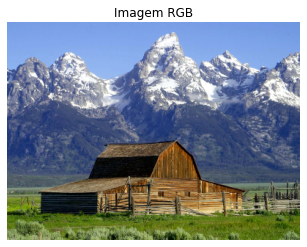

In [310]:
image = convert_ycbcr_to_rgb(image)
plot_image(np.uint8(image), title='Imagem RGB')